## Random Forest Classifier With Pipeline and Hyperparameter Tuning

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
## our output feature is time so make it numeric

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder=LabelEncoder()

In [9]:
df['time']=encoder.fit_transform(df['time'])

In [11]:
df.time.unique()

array([0, 1])

In [12]:
## independent and dependent feature

In [13]:
x=df.drop(columns=['time'])
y=df['time']

In [15]:
x.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time, Length: 244, dtype: int64

In [19]:
import matplotlib.pyplot as plt

<AxesSubplot: >

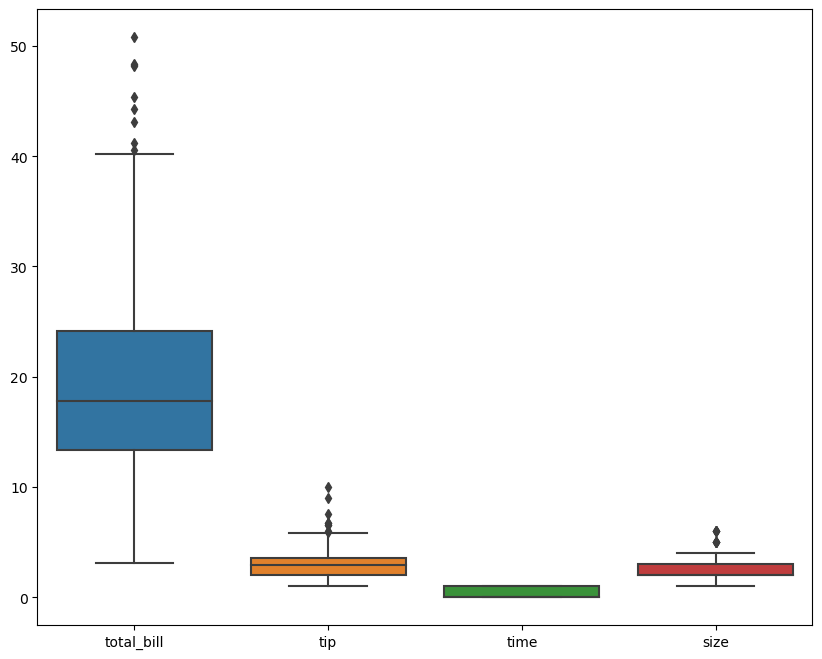

In [21]:
plt.subplots(figsize=(10,8))
sns.boxplot(data=df)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
from sklearn.impute import SimpleImputer ## To handle missing values to automate the process in end to end deployment

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
from sklearn.compose import ColumnTransformer

In [31]:
categorical_col=['sex','smoker','day']
numerical_col=['total_bill','tip','size']

In [30]:
## Feature Engineering Automation

## Numerical Pipeline (for feature engineering) to automate
num_pipeline=Pipeline(
    steps=[('imputer',SimpleImputer(strategy='median')), ## handle missing value
           ('scaler',StandardScaler()) ]) ## feature scaling

## Categorical Pipeline
cat_pipeline=Pipeline(
       steps=[('imputer',SimpleImputer(strategy='most_frequent')), ## handling missing value
             ('ohe',OneHotEncoder())] ## categorical feature to numerical feature

)



In [32]:
preprocessor=ColumnTransformer([
          ('num_pipeline',num_pipeline,numerical_col),
          ('cat_pipeline',cat_pipeline,categorical_col)
   

])

In [33]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [35]:
x_train

array([[-0.79306155, -0.2580329 , -0.61214068, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.46322744, -0.74211442, -0.61214068, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.80730659,  0.6399734 , -0.61214068, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.65383098, -1.46472887, -0.61214068, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.64749986,  0.32426806, -0.61214068, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.75289699, -0.41237773,  0.45363997, ...,  1.        ,
         0.        ,  0.        ]])

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [82]:
## Model Training Automation
models={'Random Forest':RandomForestClassifier(),'logistic':LogisticRegression(),'decision tree':DecisionTreeClassifier()}

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [84]:
def evaluate_model(x_train,x_test,y_train,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(x_train,y_train)
        
        y_pred=model.predict(x_test)
        score=accuracy_score(y_test,y_pred)
        report[list(models.keys())[i]]=score

        
    return report
        

In [86]:
model_report=evaluate_model(x_train,x_test,y_train,y_test,models)

In [87]:
## To get the best order from the report
best_score=max(list(model_report.values()))

In [88]:
best_score

1.0

In [89]:
model_report

{'Random Forest': 0.9591836734693877,
 'logistic': 1.0,
 'decision tree': 0.9387755102040817}

In [90]:
rfc=RandomForestClassifier() ## because there is overfitting in case of logistic regression

In [95]:
## Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

In [96]:
parameter={'max_depth':[3,5,10,None],
          'n_estimators':[100,200,300],
          'criterion':['gini','entropy']}

In [97]:
rsc=RandomizedSearchCV(rfc,param_distributions=parameter,cv=5,verbose=3,scoring='accuracy')

In [98]:
rsc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.974 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.923 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.974 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.923 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=300;, score=0.949 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.974 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.923 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=100;, score=1.000 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.949 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=100;, score=0.923 total time=   0.2s
[CV 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [99]:
rsc.best_params_

{'n_estimators': 100, 'max_depth': None, 'criterion': 'gini'}